In [1]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached h5py-3.7.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Attempting un

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

2022-12-07 22:19:52.251070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 22:19:52.419634: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-07 22:19:53.211567: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-07 22:19:53.211690: W tensorflow/

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
labels = {
    0: 'cup',
    1: 'fork',
    2: 'glass',
    3: 'knife',
    4: 'plate',
    5: 'spoon'
}

In [5]:
image_size = (299, 299)

In [6]:
model = keras.models.load_model('xception_v4_large_12_0.965.h5')

2022-12-07 22:19:55.221101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 22:19:55.303934: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-07 22:19:55.303974: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-12-07 22:19:55.304370: I tensorflow/core/platform/cpu_feature_guard.c

In [7]:
from tensorflow.keras.preprocessing.image import load_img 

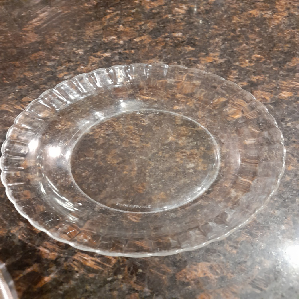

In [8]:
path = 'kitchenware-classification/kitchenware-classification/images/6534.jpg'
img = load_img(path, target_size=(image_size))
img

In [9]:
from tensorflow.keras.applications.xception import preprocess_input

In [10]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [11]:
pred = model.predict(X)

1/1 [==============================] - 1s 882ms/step


In [12]:
pred[0]

array([ 0.3084181, -1.6690345,  2.5522997, -2.6600866,  8.237878 ,
       -1.5358653], dtype=float32)

In [13]:
pred[0].argmax()

4

In [154]:
labels[pred[0].argmax()]

'knife'

In [217]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [538]:
path = 'kitchenware-classification/kitchenware-classification/images/5242.jpg'
img = load_img(path, target_size=(image_size))
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
pred = model.predict(X)
labels[pred[0].argmax()]

1/1 [==============================] - 0s 183ms/step


'cup'

In [283]:
from pathlib import Path

import pandas as pd

In [1]:
project_dir = Path('kitchenware-classification/kitchenware-classification')
test_data = project_dir / 'test.csv'

NameError: name 'Path' is not defined

In [ ]:
#train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

#train_df['filename'] = train_df['Id'].apply(lambda x: f"{x:04d}.jpg")
test_df['filename'] = test_df['Id'].apply(lambda x: f"{x:04d}.jpg")

In [ ]:
display(test_df.head())